# Notebook to train the colored shapes dataset.

This notebook is written to train the colored shapes dataset and test it with everyday images to check if color identification is possible.

In [67]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Imports for the program

In [68]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

Setting batchsize.

In [69]:
bs = 64

In [70]:
path = Path("/home/jupyter/chiller_vision/colored_shapes_white/")


In [71]:
doc(ImageDataBunch.from_folder)


In [72]:
path.ls()

[PosixPath('/home/jupyter/chiller_vision/colored_shapes_white/blue'),
 PosixPath('/home/jupyter/chiller_vision/colored_shapes_white/brown'),
 PosixPath('/home/jupyter/chiller_vision/colored_shapes_white/orange'),
 PosixPath('/home/jupyter/chiller_vision/colored_shapes_white/red'),
 PosixPath('/home/jupyter/chiller_vision/colored_shapes_white/yellow'),
 PosixPath('/home/jupyter/chiller_vision/colored_shapes_white/black'),
 PosixPath('/home/jupyter/chiller_vision/colored_shapes_white/green'),
 PosixPath('/home/jupyter/chiller_vision/colored_shapes_white/violet')]

In [73]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=bs, valid_pct=0.2
                                  ).normalize(imagenet_stats)

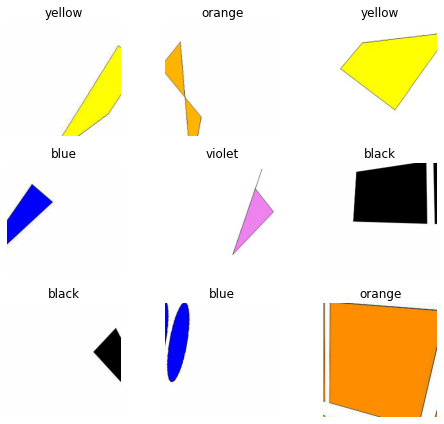

In [74]:
data.show_batch(rows=3, figsize=(7,6))

In [75]:
print(data.classes)
len(data.classes),data.c

['black', 'blue', 'brown', 'green', 'orange', 'red', 'violet', 'yellow']


(8, 8)

# Training Resnet34

In [76]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [77]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [79]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.054446,0.146470,0.022989,00:03
1,0.066997,0.151631,0.022989,00:03
2,0.069227,0.138411,0.022989,00:03
3,0.079123,0.122909,0.022989,00:03
4,0.086552,0.150837,0.040230,00:03
5,0.084676,0.134016,0.028736,00:03
6,0.080694,0.124050,0.022989,00:03
7,0.078005,0.119952,0.028736,00:03
8,0.084913,0.113972,0.028736,00:03
9,0.078191,0.111979,0.028736,00:03


In [80]:
learn.save('stage-1')

# Result Interpretation

In [81]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

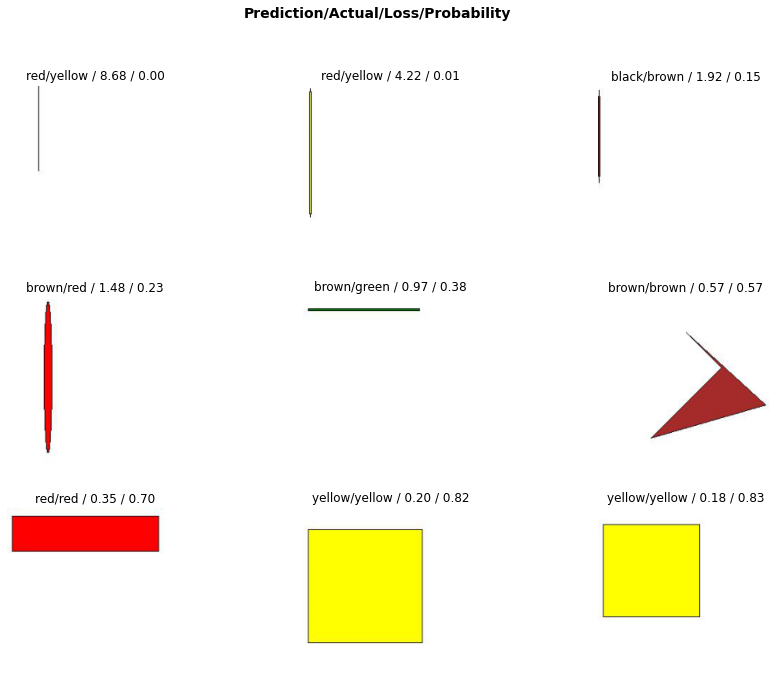

In [82]:
interp.plot_top_losses(9, figsize=(15,11))

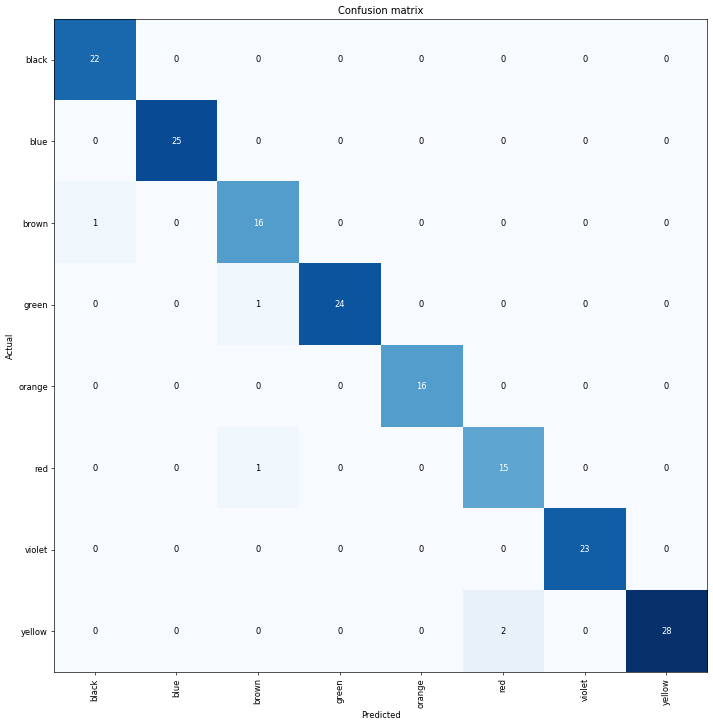

In [83]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [84]:
interp.most_confused(min_val=2)

[('yellow', 'red', 2)]

# Classification

In [85]:
learn.export()

In [86]:
test_image_path = Path("/home/jupyter/Datasets/trainimg/train/")

In [201]:
img1 = open_image(test_image_path/"black"/"9.jpg")

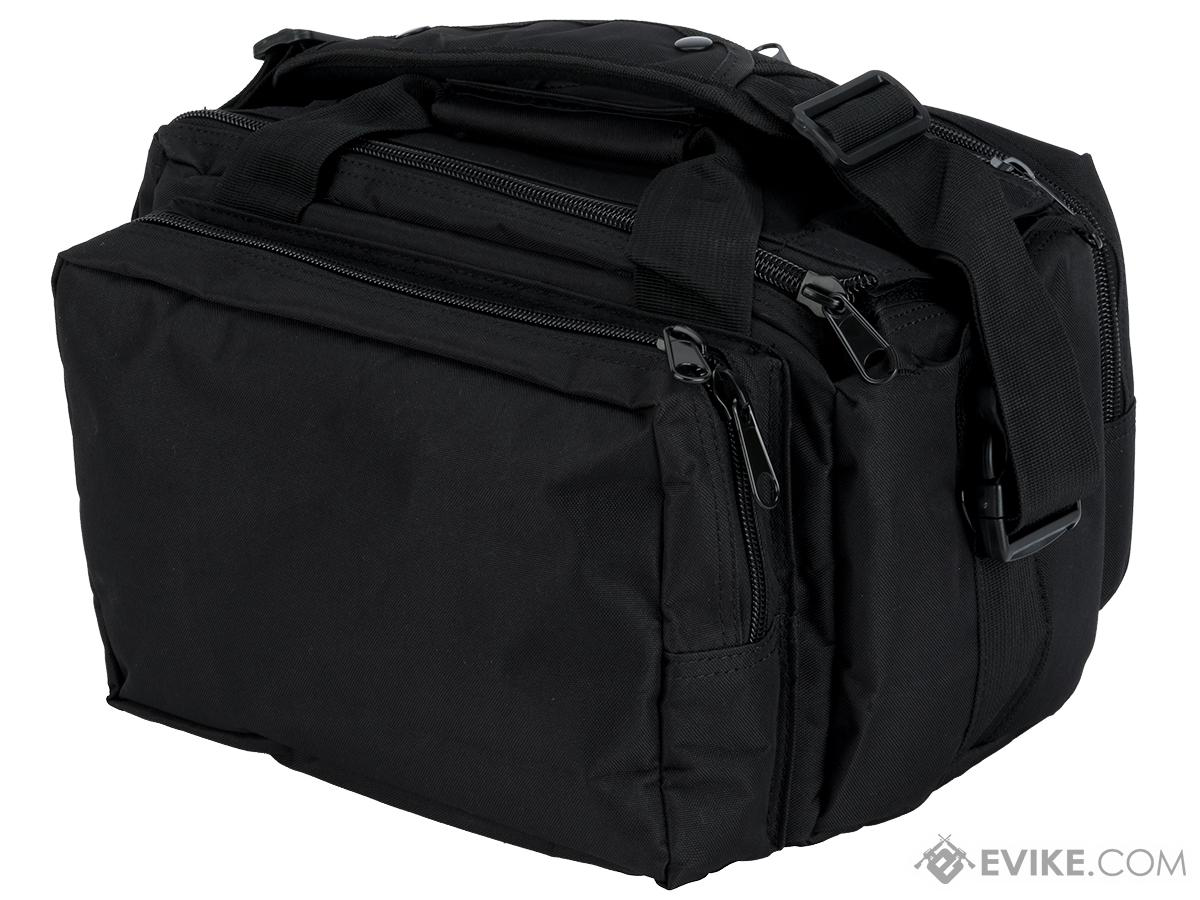

In [202]:
img1

In [203]:
pred_class,pred_idx,outputs = learn.predict(img1)
pred_class

Category tensor(0)

In [204]:
learn.predict(img1)

(Category tensor(0),
 tensor(0),
 tensor([9.9992e-01, 1.6867e-06, 4.8201e-06, 7.2298e-05, 5.5198e-08, 6.9399e-07,
         2.1055e-06, 3.7582e-08]))